<img src="https://raw.githubusercontent.com/codecaviar/digital_asset_management/master/assets/bingyune-and-company-logo-6400x3600.png" align="left" width="200" height="auto">

<br/> <br/> <br/> <br/>

# Housing Crisis: 4 Tactics to Detect and Remove Outliers

**BingYune Chen**, Principal Data Scientist<br>
2020-07-16 | 8 minute read

Data is provided by [Scikit-Learn](https://scikit-learn.org/stable/datasets/index.html#boston-dataset) 
    | Source code is on [Github](https://github.com/codecaviar)

---

The goal of this project is to highlight 3 key methods to correctly deal with outliers in your data. In machine learning and in any quantitative filed of study, the quality of data directly impacts the quality of your findings.

## Table of Contents

1. [**Project Overview**](#overview)
2. [**Extreme Value Analysis**](#extreme_value)
3. [**Proximity Methods**](#proximity_methods)
4. [**Projection Methods**](#projection_methods)
5. [**Higher Dimensional Automatic Detection**](#higher_dimensional)
6. [**Conclusion**](#conclusion)

<a class="anchor" id="overview"></a>
# 1. Project Overview

Outliers are extreme data values that are far away from other values in your dataset. Outliers can distort the conclusions you draw from descriptive statistics (like mean and standard deviation) and from data visuals (like histograms and scatter plots). Many machine learning algorithms and statistical models are also sensitive to the range and distribution of data values used in your training data. Some of the most common causes of outliers in a dataset include data entry errors (human errors), measurement errors (instrument errors), and data processing errors (data manipulation errors). Consequently, outliers can come from multiple sources and hide in a single feature or n-dimensional feature space. Aside from the specific task of investigating these extreme data values (for anomaly detection) or in the case of naturally occurring outliers (novelties), the goal is often to remove or ignore outliers in your analysis.         

<a class="anchor" id="problem_statement"></a>
## 1.1 Problem Statement

The goal of this project is to provide a Quick Guide on 4 popular methods for outlier detection. The project makes use of the Boston House Pricing Dataset from the [Sckit-Learn dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html). This dataset contains 506 instances and 13 numeric/categorical attributes (with no missing values). This dataset is a copy of [UCI ML housing dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/) and was taken from the StatLib library maintained at Carnegie Mellon University.

<a class="anchor" id="attribute_information"></a>
## 1.2 Data Attribute Information (in order)

* CRIM is per capita crime rate by town
* ZN is proportion of residential land zoned for lots over 25,000 sqft
* INDUS is proportion of non-retail business acres per town
* CHAS is Charles River dummy variable (equals 1 if tract bounds river; 0 otherwise)
* NOX is nitric oxides concentration (parts per 10 million)
* RM is average number of rooms per dwelling
* AGE is proportion of owner-occupied units built prior to 1940
* DIS is weighted distances to five Boston employment centres
* RAD is index of accessibility to radial highways
* TAX is full-value property-tax rate per \$10,000
* PTRATIO is pupil-teacher ratio by town
* B is 1000(Bk - 0.63)^2 where Bk is the proportion of Black individuals by town
* LSTAT is \% lower status of the population
* MEDV is Median value of owner-occupied homes in \$1000’s



In [1]:
# Import libraries for numpy, pandas, matplotlib, sklearn, etc.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm

# Display output of plotting commands, inline within frontends like Jupyter Notebook
%matplotlib inline
plt.style.use('fivethirtyeight') # customize matplotlib with style sheets

# Load the data from sklearn
from sklearn.datasets import load_boston
boston = load_boston()
X = boston.data
y = boston.target

columns = boston.feature_names #create the dataframe
boston_df = pd.DataFrame(boston.data)
boston_df.columns = columns
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


<a class="anchor" id="extreme_value"></a>
# 2. Extreme Value Analysis

You do not need to know advanced statistical methods to detect, analyze, and remove outliers from your data. With extreme value analysis, you focus on univariate methods such as visualizing the data and looking for values more than 2 or 3 standard deviations from the mean.

<a class="anchor" id="visualizing_data"></a>
## 2.1 Visualizing Data
You can simply use scatterplots, histograms, and box plots to look for extreme values. 

According to Wikipedia:
> A **scatter plot**, is a type of plot or mathematical diagram using Cartesian coordinates to display values for typically two variables for a set of data. The data are displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis.

> A **histogram** is an approximate representation of the distribution of numerical data...To construct a histogram, the first step is to "bin" (or "bucket") the range of values—that is, divide the entire range of values into a series of intervals—and then count how many values fall into each interval. The bins are usually specified as consecutive, non-overlapping intervals of a variable. 

> A **box plot** is a method for graphically depicting groups of numerical data through their quartiles. Box plots may also have lines extending vertically from the boxes (whiskers) indicating variability outside the upper and lower quartiles, hence the terms box-and-whisker plot and box-and-whisker diagram. Outliers may be plotted as individual points.

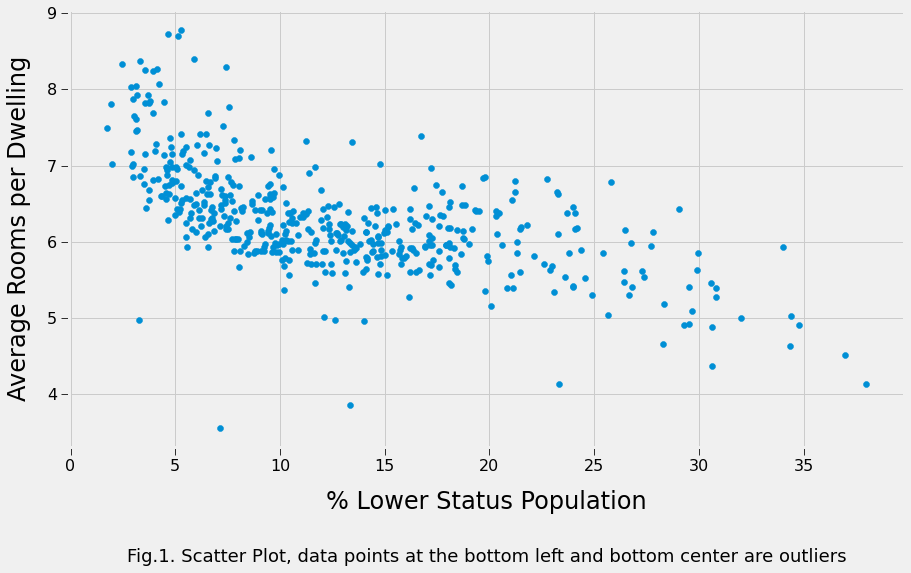

In [2]:
# Create a scatter plot
fig,ax = plt.subplots(figsize=(13.33, 7.5))
ax.scatter(boston_df['LSTAT'], boston_df['RM'])

# Add labels
ax.set_xlabel('% Lower Status Population', size=24, labelpad=16)
ax.set_ylabel('Average Rooms per Dwelling', size=24, labelpad=16)
plt.tick_params(axis='both', labelsize=16, length=8)

# Add caption
fignum = 1
figtxt = ". Scatter Plot, data points at the bottom left and bottom center are outliers"
figcap = "Fig." + str(fignum) + figtxt
ax.text(0.5, -0.25, figcap, fontsize=18, ha='center', va='center', transform=ax.transAxes)
plt.savefig('fig' + str(fignum) + '-outlier-scatter-plot.png', bbox_inches='tight')

# Show plot
plt.show(); 

# Plot highlights a few data points far away from most of the other points.
# These data points (at the bottom left and bottom center) are likely  to be outliers.

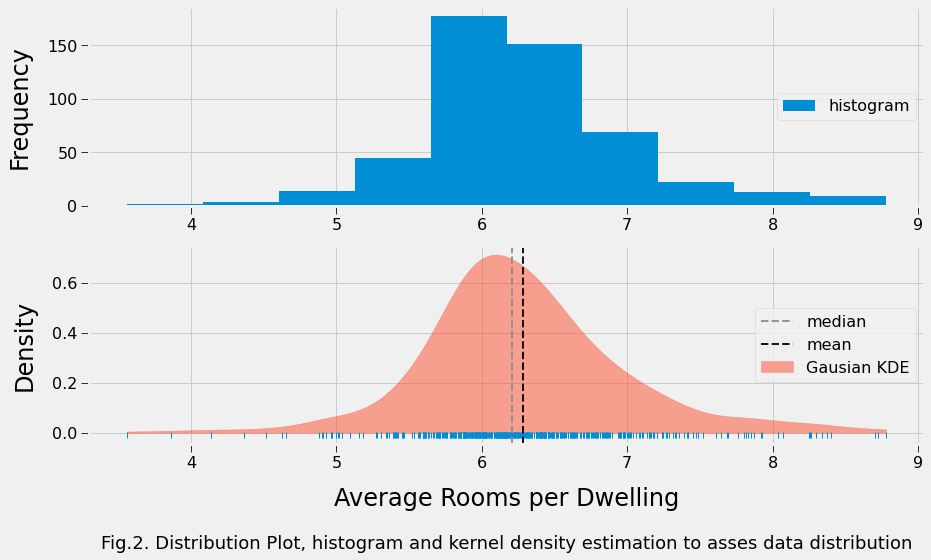

In [3]:
# Create a historm plot
fig,ax = plt.subplots(2, figsize=(13.33, 7.5))

# Get series for a single feature x
xi = boston_df['RM'].values

# Create histogram
# https://jakevdp.github.io/PythonDataScienceHandbook/05.13-kernel-density-estimation.html
ax[0].hist(xi, bins=10, label='histogram')

# Use Gaussian rule-of-thumb to attempt to find a nearly optimal smoothing length
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gaussian_kde.html
from sklearn.neighbors import KernelDensity # as opposed to from scipy.stats import gaussian_kde
from sklearn.model_selection import GridSearchCV, LeaveOneOut # use GridSearchCV to optimize bandwidth 
bandwidths = 10 ** np.linspace(-1, 1, 100)
grid = GridSearchCV(KernelDensity(kernel='gaussian'),
                    {'bandwidth': bandwidths},
                    cv=LeaveOneOut())
grid.fit(np.resize(xi, (len(xi), 1)))
kde = KernelDensity(bandwidth=list(grid.best_params_.values())[0], kernel='gaussian')
kde.fit(np.resize(xi, (len(xi), 1)))

xd = np.linspace(xi.min(), xi.max(), len(xi))
logprob = kde.score_samples(np.resize(xd,(len(xd), 1))) # score_samples returns the log of the probability density

ax[1].fill_between(xd, np.exp(logprob), color='#fc4f30', label="Gausian KDE", alpha=0.5)
ax[1].plot(xi, np.full_like(xi, -0.01),'|', markeredgewidth=1)

ax[1].axvline(np.median(xi), color='#8b8b8b', linestyle='dashed',
            linewidth=2.0, label='median', alpha=0.9)
ax[1].axvline(np.mean(xi), color='black', linestyle='dashed',
            linewidth=2.0, label='mean', alpha=0.9)

# Add labels
ax[0].set_ylabel('Frequency', size=24, labelpad=16)
ax[1].set_ylabel('Density', size=24, labelpad=16)
ax[1].set_xlabel('Average Rooms per Dwelling', size=24, labelpad=16)
ax[0].tick_params(axis='both', labelsize=16, length=8)
ax[1].tick_params(axis='both', labelsize=16, length=8)
ax[0].legend(loc='center right', fontsize=16)
ax[1].legend(loc='center right', fontsize=16)

# Add caption
fignum += 1
figtxt = ". Distribution Plot, histogram and kernel density estimation to asses data distribution"
figcap = "Fig." + str(fignum) + figtxt
ax[1].text(0.5, -0.5, figcap, fontsize=18, ha='center', va='center', transform=ax[1].transAxes)
plt.savefig('fig' + str(fignum) + '-outlier-histogram-kde.png', bbox_inches='tight')

plt.show();

# Plot appears to be normally distributed, with right skew as mode < mean
# No clear outliers visible from histogram or KDE

Finally, you can compare the kernel density estimate of x_point to the average kernel density estimate over all values in X_feature. The equation would then flag x_point if its outlier score fell below some defined threshold.

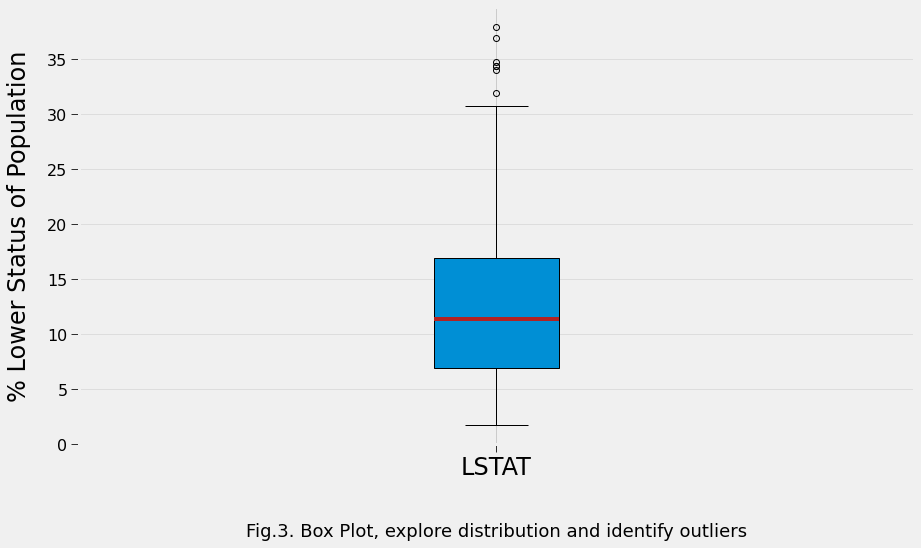

In [4]:
# Create box plot
fig,ax = plt.subplots(figsize=(13.33, 7.5))
medianprops = dict(linestyle='-', linewidth=4, color='firebrick')
bp = plt.boxplot(boston_df['LSTAT'], vert=1, whis=1.5, patch_artist=True, medianprops=medianprops)

ax.yaxis.grid(True, linestyle='-', which='major', alpha=0.5)
ax.set_ylabel('% Lower Status of Population', size=24, labelpad=16)
ax.set_ylim(bottom=0)
xtickNames = plt.setp(ax, xticklabels=['LSTAT'])
plt.setp(xtickNames, size=16)
plt.tick_params(axis='x', labelsize=24, length=8)
plt.tick_params(axis='y', labelsize=16, length=8)

# Add caption
fignum += 1
figtxt = ". Box Plot, explore distribution and identify outliers"
figcap = "Fig." + str(fignum) + figtxt
ax.text(0.5, -0.2, figcap, fontsize=18, ha='center', va='center', transform=ax.transAxes)
plt.savefig("fig" + str(fignum) + '-outlier-box-plot.png', bbox_inches='tight')

plt.show();

# Plot highlights three data points above 30, with minor right skew
# These data points are outliers as they are not included in the box of other observations.

<a class="anchor" id="standard_deviations"></a>
## 2.2 Use Z-score and Interquartile Range
Alternatively, you can assume a normal distribution (mean = 0, standard deviation = 1) and calculate values more than 2 or 3 standard deviations from the mean or 1.5 times from the first or third quartile ranges.

According to Wikipedia:

> **Z-score** is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured.

> **Interquartile Range (IQR)**, also called the midspread or middle 50%, or technically H-spread, is a measure of statistical dispersion, being equal to the difference between 75th and 25th percentiles, or between upper and lower quartiles, IQR = Q3 − Q1.

In [5]:
# Use the Z-score function in Scipy library to detect outliers
from scipy import stats
z = np.abs(stats.zscore(boston_df))
print(z)

[[0.41978194 0.28482986 1.2879095  ... 1.45900038 0.44105193 1.0755623 ]
 [0.41733926 0.48772236 0.59338101 ... 0.30309415 0.44105193 0.49243937]
 [0.41734159 0.48772236 0.59338101 ... 0.30309415 0.39642699 1.2087274 ]
 ...
 [0.41344658 0.48772236 0.11573841 ... 1.17646583 0.44105193 0.98304761]
 [0.40776407 0.48772236 0.11573841 ... 1.17646583 0.4032249  0.86530163]
 [0.41500016 0.48772236 0.11573841 ... 1.17646583 0.44105193 0.66905833]]


In [6]:
# Set a threshold to identify an outlier
threshold = 3
print(np.where(z > 3))

# First array contains the list of row numbers 
# Second array respective column numbers

(array([ 55,  56,  57, 102, 141, 142, 152, 154, 155, 160, 162, 163, 199,
       200, 201, 202, 203, 204, 208, 209, 210, 211, 212, 216, 218, 219,
       220, 221, 222, 225, 234, 236, 256, 257, 262, 269, 273, 274, 276,
       277, 282, 283, 283, 284, 347, 351, 352, 353, 353, 354, 355, 356,
       357, 358, 363, 364, 364, 365, 367, 369, 370, 372, 373, 374, 374,
       380, 398, 404, 405, 406, 410, 410, 411, 412, 412, 414, 414, 415,
       416, 418, 418, 419, 423, 424, 425, 426, 427, 427, 429, 431, 436,
       437, 438, 445, 450, 454, 455, 456, 457, 466]), array([ 1,  1,  1, 11, 12,  3,  3,  3,  3,  3,  3,  3,  1,  1,  1,  1,  1,
        1,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  5,  3,  3,  1,  5,
        5,  3,  3,  3,  3,  3,  3,  1,  3,  1,  1,  7,  7,  1,  7,  7,  7,
        3,  3,  3,  3,  3,  5,  5,  5,  3,  3,  3, 12,  5, 12,  0,  0,  0,
        0,  5,  0, 11, 11, 11, 12,  0, 12, 11, 11,  0, 11, 11, 11, 11, 11,
       11,  0, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11]

In [7]:
# Print the first outlier with Z-score > 3
print('Z-score: {}'.format(z[55][1]), 
      '\nColumn Name: {}'.format(boston_df.columns[1]),
      '\nRow Value: {}'.format(boston_df.iloc[55,1]))

Z-score: 3.375038763517309 
Column Name: ZN 
Row Value: 90.0


In [8]:
# Calculate interquartile range
q1 = boston_df.quantile(0.25)
q3 = boston_df.quantile(0.75)
iqr = q3 - q1
print(iqr)

CRIM         3.595038
ZN          12.500000
INDUS       12.910000
CHAS         0.000000
NOX          0.175000
RM           0.738000
AGE         49.050000
DIS          3.088250
RAD         20.000000
TAX        387.000000
PTRATIO      2.800000
B           20.847500
LSTAT       10.005000
dtype: float64


In [9]:
# Locate all outliers
pd.DataFrame(boston_df < (q1 - 1.5 * iqr)) | (boston_df > (q3 + 1.5 * iqr))

# False means the values are valid
# True indicates presence of an outlier

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,False,False,False,False,False,False,False,False,False,False,False,False,False
502,False,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False,False
504,False,False,False,False,False,False,False,False,False,False,False,False,False


<a class="anchor" id="proximity_methods"></a>
# 3. Proximity Methods

Once you have explored simpler extreme value analysis, consider moving onto proximity methods. These methods can be divided into distance-based (an object is an outlier if its neighborhood doesn’t have enough points) and density-based methods (An object is an outlier if its density relatively much lower than that of its neighbors). The general steps are as follows: 

<ol>
<li> Use a clustering method to identify the natural clusters in the data (e.g. k-means or DBSCAN)
<li> Identify and mark the cluster centroids
<li> Identify data instances that are a fixed distance or percentage distance from cluster centroids
<li> Remove outliers from training dataset and asses your models performance
</ol>

<a class="anchor" id="dbscan"></a>
## 3.1 K-means
K-means algorithm is an iterative algorithm that tries to partition the data into K pre-defined distinct non-overlapping subgroups (clusters) where each data point belongs to only one group. The way k-means clustering follows these steps: 

<ol>
<li> Specify number of clusters K
<li> Initialize centroids to shuffle and randomly select K data points without replacement
<li> Compute the sum of squared distance between data points and all centroids
<li> Assign each data point to the closet cluster (centroid)
<li> Computer the centroids for the clusters by taking the average of all the data points that belong to each cluster
<li> Iterate until there is no change to the centroids
</ol

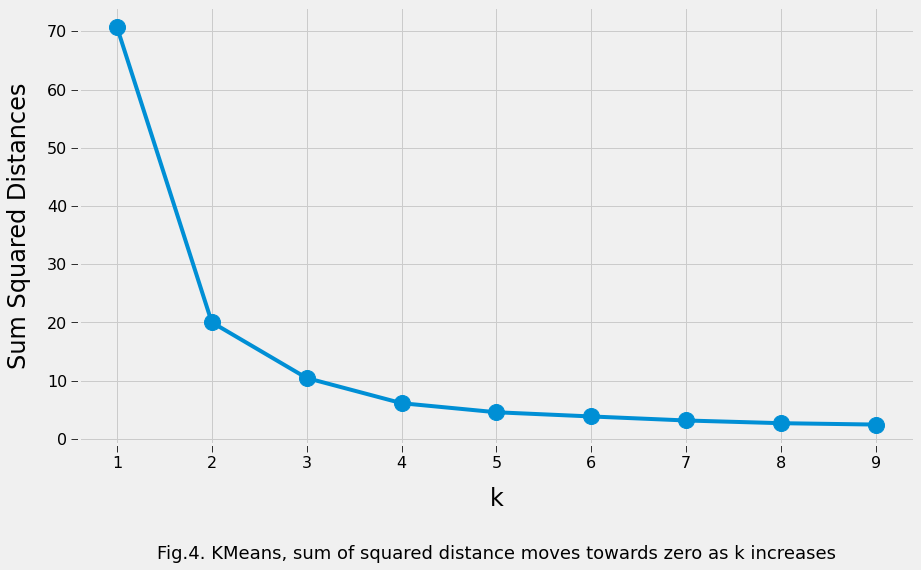

In [10]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

# Define the feature space
xi = boston_df[['TAX', 'DIS']]

mms = MinMaxScaler()
mms.fit(xi)
data_transformed = mms.transform(xi)

# Find the optimal k value for the feature
sum_squared_distances = []
K = range(1, 10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    sum_squared_distances.append(km.inertia_)

# As k increases, the sum of squared distance tends to zero.
# Imagine setting k to its maximum value n (where n is number of samples)
# each sample would form its own cluster meaning sum of squared distances is zero

fig,ax = plt.subplots(figsize=(13.33, 7.5))
ax.plot(K, sum_squared_distances, markersize=16, marker='o')
ax.set_xlabel('k', size=24, labelpad=16)
ax.set_ylabel('Sum Squared Distances', size=24, labelpad=16)
ax.tick_params(axis='both', labelsize=16, length=8)

# Add caption
fignum += 1
figtxt = ". KMeans, sum of squared distance moves towards zero as k increases"
figcap = "Fig." + str(fignum) + figtxt
ax.text(0.5, -0.25, figcap, fontsize=18, ha='center', va='center', transform=ax.transAxes)
plt.savefig('fig' + str(fignum) + '-kmeans-optimal-kvalue.png', bbox_inches='tight')

plt.show; # elbow is at k=3, indicating the optimal k is 3

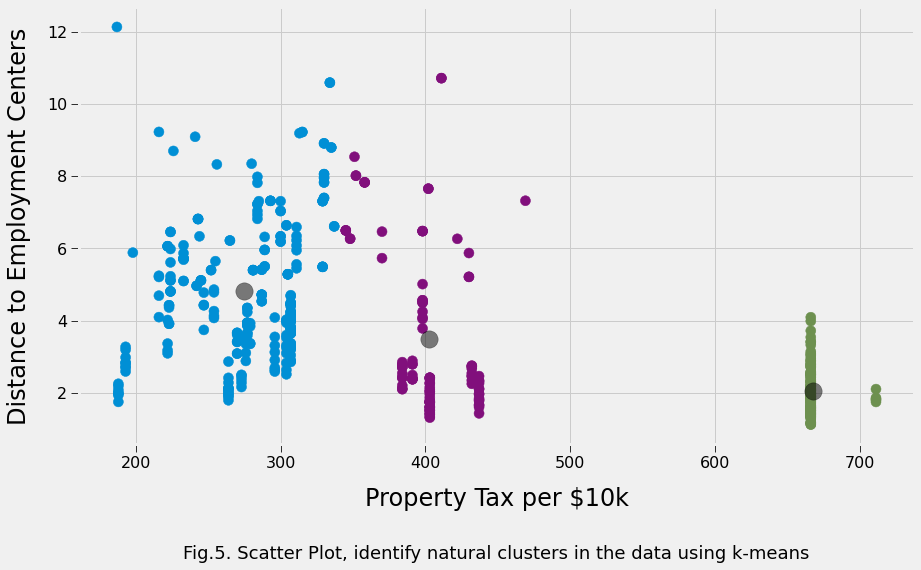

In [11]:
# Define the feature
x2d = xi.values

# Define the model
model = KMeans(n_clusters=3)

# Fit the model
model.fit(x2d)

# Assign a cluster to each example
labels = model.predict(x2d)

# Retrieve unique clusters
clusters = np.unique(labels)

import matplotlib
get_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']                       
colors = [color for color in get_colors]

fig,ax = plt.subplots(figsize=(13.33, 7.5))
ax.scatter(x2d[:, 0], x2d[:, 1], c=labels, 
           cmap=matplotlib.colors.ListedColormap(colors), s=100)

centers = model.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], c='black', s=300, alpha=0.5)

ax.set_xlabel('Property Tax per $10k', size=24, labelpad=16)
ax.set_ylabel('Distance to Employment Centers', size=24, labelpad=16)
ax.tick_params(axis='both', labelsize=16, length=8)

# Add Caption
fignum += 1
figtxt = ". Scatter Plot, identify natural clusters in the data using k-means"
figcap = "Fig." + str(fignum) + figtxt
ax.text(0.5, -0.25, figcap, fontsize=18, ha='center', va='center', transform=ax.transAxes)
plt.savefig('fig' + str(fignum) + '-kmeans-proximity-centers.png', bbox_inches='tight')

# Show the plot
plt.show();

# K-means identifies three natural clusters from these two features

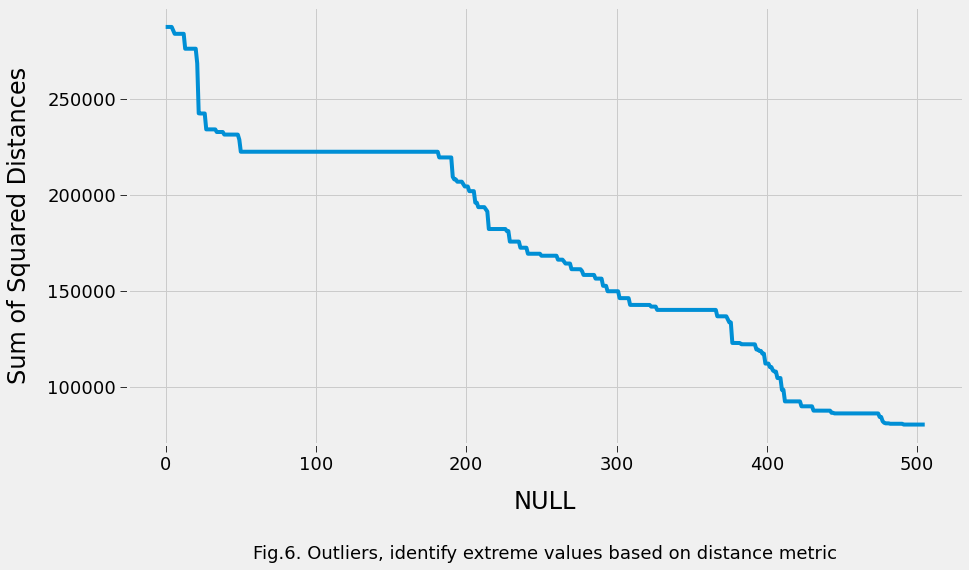

,sqdist,label
489,287214.39,1
488,287213.73,1
490,287213.71,1
491,287213.27,1
492,287211.14,1


In [12]:
# Calculate distance between data points and cluster centers 
# Determine outliers and identify 5 largest distances

# Square distance to cluster center
x_dist = model.transform(xi) ** 2
df = pd.DataFrame(x_dist.sum(axis=1).round(2), columns=['sqdist'])
df['label'] = labels

# Plot distance to identify outliers
fig,ax = plt.subplots(figsize=(13.33, 7.5))
ax.plot(np.arange(0, len(df['sqdist'])), df['sqdist'].sort_values(ascending=False))
ax.set_xlabel('NULL', size=24, labelpad=16)
ax.set_ylabel('Sum of Squared Distances', size=24, labelpad=16)
ax.tick_params(axis='both', labelsize=18, length=8)

# Add caption
fignum += 1
figtxt = ". Outliers, identify extreme values based on distance metric"
figcap = "Fig." + str(fignum) + figtxt
ax.text(0.5, -0.25, figcap, fontsize=18, ha='center', va='center', transform=ax.transAxes)
plt.savefig('fig' + str(fignum) + '-kmeans-distances-proximity.png', bbox_inches='tight')

plt.show();

x_outliers = df.sort_values(['sqdist', 'label'], ascending=[0,1])[0:5]
x_outliers # these rows are 5 top outliers based on distance

# The top outlier candidates appear to be in cluster 1 (purple dots in chart above)
# Top outliers have the largest sum of squared distance values

<a class="anchor" id="dbscan"></a>
## 3.2 DBSCAN
Density-Based Spatial Clustering of Applications with Noise (DBSCAN) is a clustering algorithm that's used to cluster data into groups. DBSCAN is also used as a density-based outlier detection method with either single or multi-dimensional data. 

In the DBSCAN clustering method, all data points are defined either as Core Points, Border Points or Noise Points: 
> **Core Points** are data points that have at least MinPts neighboring data points within a distance $\epsilon$

> **Border Points** are neighbors of a Core Point within the distance $\epsilon$ but with less than MinPts neighbors within the distance $\epsilon$. 

> All other data points are **Noise Points**, also identified as outliers.

Outlier detection thus depends on the required number of neighbors MinPts, the distance $\epsilon$ and the selected distance measure, like Euclidean or Manhattan. We find a suitable value for $\epsilon$ by calculating the distance to the nearest n points for each point, sorting and plotting the results. The point where the change is most pronounced will be selected as $\epsilon$. Even though DBSCAN will figure out the number of clusters, the model is very sensitive to scale since $\epsilon$ is a fixed value for the maximum distance between two points.

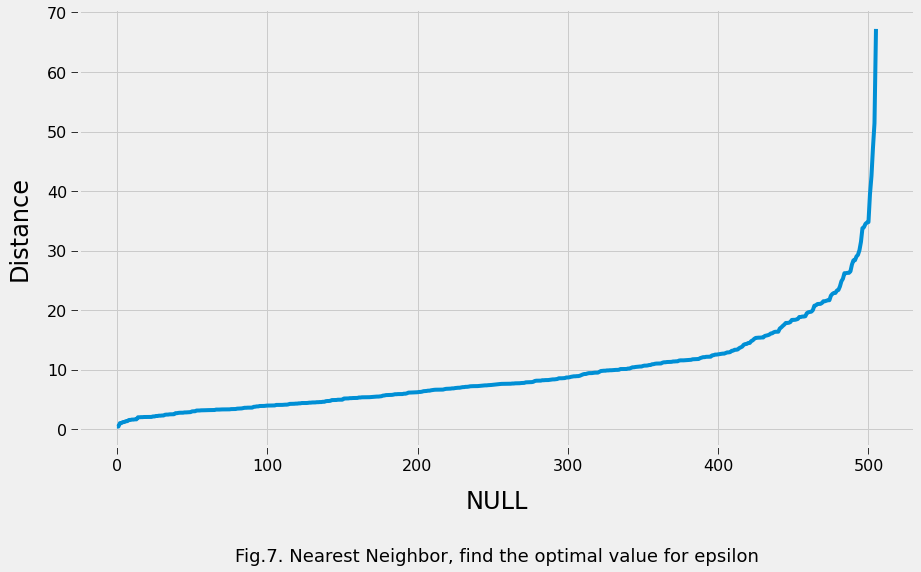

In [13]:
# Calculate the distance from each point to its closet neighbor 
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

# distances is array that contains the distance to the closest n_neighbors
# indices is array that contains the index for each of those points

distances = np.sort(distances, axis=0)
distances = distances[:, 1]

# Plot distances
fig,ax = plt.subplots(figsize=(13.33, 7.5))
ax.plot(distances)
ax.set_ylabel('Distance', size=24, labelpad=16)
ax.set_xlabel('NULL', size=24, labelpad=16)
ax.tick_params(axis='both', labelsize=16, length=8)

# Add caption
fignum += 1
figtxt = ". Nearest Neighbor, find the optimal value for epsilon"
figcap = "Fig." + str(fignum) + figtxt
ax.text(0.5, -0.25, figcap, fontsize=18, ha='center', va='center', transform=ax.transAxes)
plt.savefig('fig' + str(fignum) + '-dbscan-optimal-eps.png', bbox_inches='tight')

plt.show();

# Optimal value for epsilon is at point of max curvature, distance = 25

Total Outliers:  62


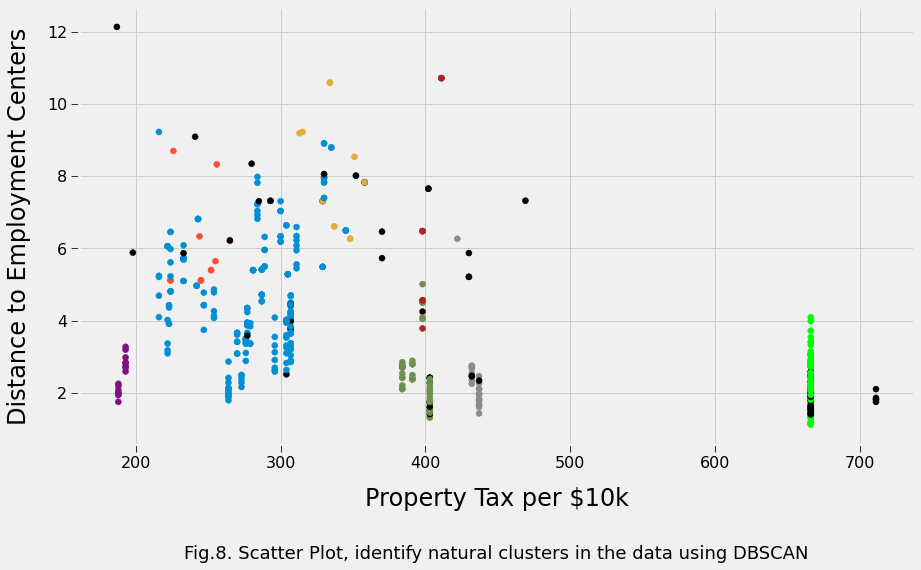

In [14]:
# Identify Noise Points from DBSCAN
from sklearn.cluster import DBSCAN

dbscan_model = DBSCAN(eps=25, min_samples=5) # min points based on domain knowledge
dbscan_model.fit_predict(X) # train the model with eps and min_samples
clusters = dbscan_model.labels_ # contains list of clusters and respective points

# SKlearn labels the noisy points as (-1), but higher the dimension of X, the less accurate
print("Total Outliers: ", list(clusters).count(-1)) # print 62, the total number of noisy points

# Map clusters to colors
colors = (['#008fd5', '#fc4f30', '#e5ae38', '#6d904f', '#8b8b8b', '#810f7c'] 
   + ['firebrick', 'lime', 'black']) # account for all clusters
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])

fig,ax = plt.subplots(figsize=(13.33, 7.5))
ax.scatter(boston_df['TAX'], boston_df['DIS'], c=vectorizer(clusters))

ax.set_xlabel('Property Tax per $10k', size=24, labelpad=16)
ax.set_ylabel('Distance to Employment Centers', size=24, labelpad=16)
ax.tick_params(axis='both', labelsize=16, length=8)

# Add Caption
fignum += 1
figtxt = ". Scatter Plot, identify natural clusters in the data using DBSCAN"
figcap = "Fig." + str(fignum) + figtxt
ax.text(0.5, -0.25, figcap, fontsize=18, ha='center', va='center', transform=ax.transAxes)
plt.savefig('fig' + str(fignum) + '-dbscan-proximity.png', bbox_inches='tight')

plt.show();

# DBSCAN identifies more natural clusters than k-means (8 vs 3)
# Data points with 'black' color are considered to be potential outliers (label as -1)

<a class="anchor" id="projection_methods"></a>
# 4. Projection Methods

The next set of techniques to consider are projection methods, which are relatively simple to apply and quickly highlight extraneous values. You can use projection methods to summarize your data to two dimensions (such as PCA, SOM or Sammon’s mapping). After you visualize the mapping and identify outliers by hand, you can use proximity measures from projected values or codebook vectors to identify outliers.

Principal Component Analysis (PCA) is a technique used to emphasize variation and bring out strong patterns in a dataset - often used to make data easy to explore and visualize. In our dataset, PCA takes all the features (columns) of each data observation (row) and compresses them down to one single dot that represents the profile of that observation. One dot for one observation. The Boston House Pricing Dataset has 506 observations, so 506 dots will be the result of PCA.

In other words, PCA aims to extract a low dimensional set of features from a high dimensional data set with a motive to capture as much information as possible. Because outliers are different from normal data points, the outliers are more obvious on the hyperplane constructed by the lower dimensional set of features. Therefore, an outlier score can be calculated as the sum of the projected distance of an observation (row) on all features (columns) used to construct principal components.

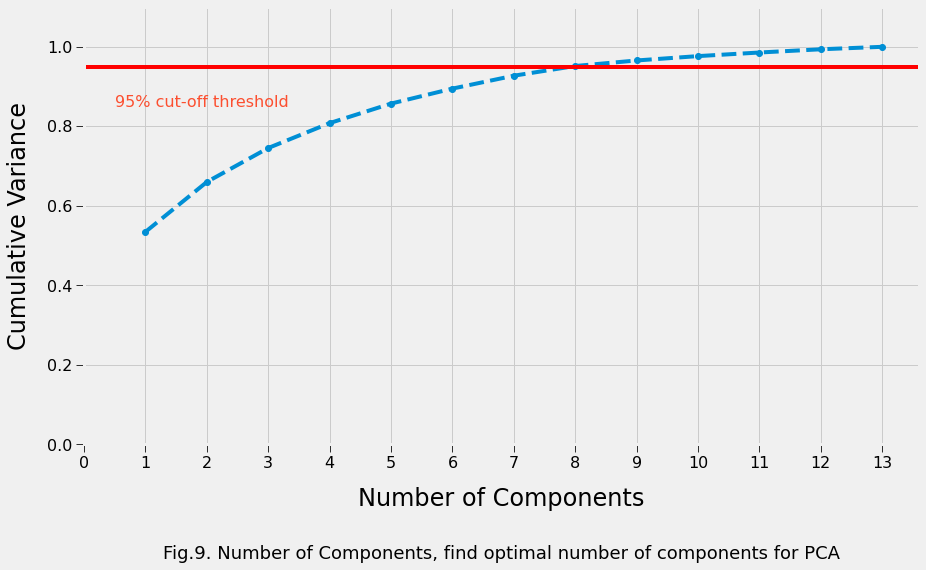

In [15]:
# Import PCA
from sklearn.decomposition import PCA

# Scale the data to range between 0 and 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_rescaled = scaler.fit_transform(X) # includes all features in DataFrame

# Instead of choosing n_components, set variance of input explained by components between 95-99%
pca = PCA() # setting n_components = 0.95 would explain 95% of variance
pca.fit(data_rescaled)

fig,ax = plt.subplots(figsize=(13.33, 7.5))
xi = np.arange(1, len(boston_df.columns) + 1, 1)
y_temp = np.cumsum(pca.explained_variance_ratio_)
ax.plot(xi, y_temp, marker='o', linestyle='--')
ax.set_ylim(0.0, 1.1)
ax.set_xticks(np.arange(0, len(boston_df.columns) + 1, 1))

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color='#fc4f30', fontsize=16)

ax.set_xlabel('Number of Components', size=24, labelpad=16)
ax.set_ylabel('Cumulative Variance', size=24, labelpad=16)
ax.tick_params(axis='both', labelsize=16, length=8)

# Add caption
fignum += 1
figtxt = ". Number of Components, find optimal number of components for PCA"
figcap = "Fig." + str(fignum) + figtxt
ax.text(0.5, -0.25, figcap, fontsize=18, ha='center', va='center', transform=ax.transAxes)
plt.savefig('fig' + str(fignum) + '-pca-optimal-ncomponents.png', bbox_inches='tight')

plt.show; # 95% of variance explained by 8 componets

# Since we are looking for outliers, visualizing on 2 components will be the best approach

In [16]:
# Create PCA
pca = PCA(n_components=2) # use 2 components to visualize outliers
pca.fit(data_rescaled)

# Transform with PCA on dataset
reduced = pca.transform(data_rescaled)

# Inverse transform back to regular dataset
inverse_reduced = pca.inverse_transform(reduced)

print("Original Shape", X.shape)
print("PCA Shape", reduced.shape)
print("Inverse Shape", inverse_reduced.shape)

Original Shape (506, 13)
PCA Shape (506, 2)
Inverse Shape (506, 13)


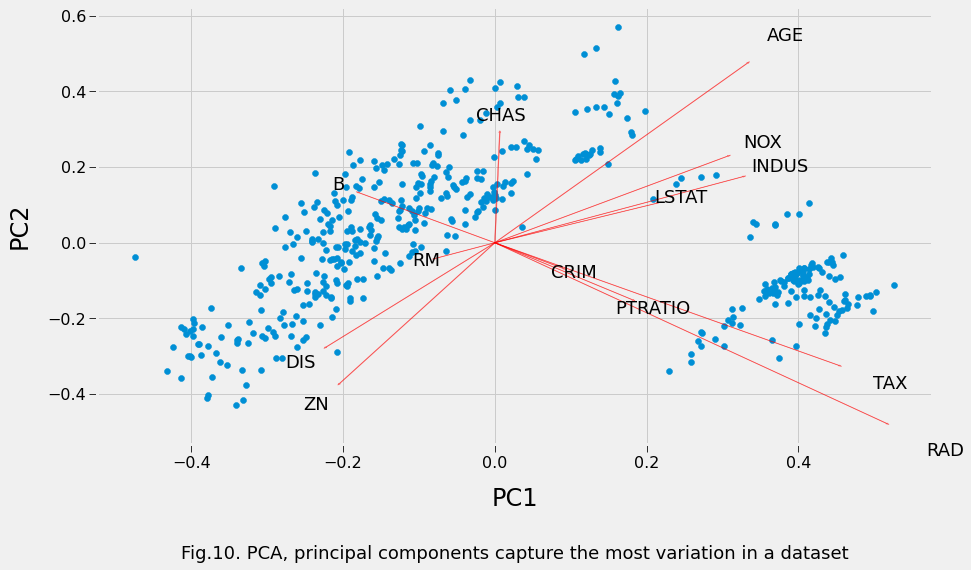

In [17]:
# Create PCA Biplot
# 1) PCA scatter plot of first two components
# 2) PCA loading plots which shows how strongly each feature influences a principal component 

def view_biplot(score, coeff, num, labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    
    fig,ax = plt.subplots(figsize=(13.33, 7.5))
    ax.scatter(xs * scalex, ys * scaley)
    
    for i in range(n):
        ax.arrow(0, 0, coeff[i,0], coeff[i,1], color='red', alpha=0.5)
        if labels is None:
            ax.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), fontsize=18, color='black', ha='center', va='center')
        else:
            ax.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], fontsize=18, color='black', ha='center', va='center')
 
    ax.set_xlabel("PC{}".format(1), size=24, labelpad=16)
    ax.set_ylabel("PC{}".format(2), size=24, labelpad=16)
    ax.tick_params(axis='both', labelsize=16, length=8)
    
    # Add caption
    fignum = num
    figtxt = ". PCA, principal components capture the most variation in a dataset"
    figcap = "Fig." + str(fignum) + figtxt
    ax.text(0.5, -0.25, figcap, fontsize=18, ha='center', va='center', transform=ax.transAxes)
    plt.savefig('fig' + str(fignum) + '-pca-biplot-vectors.png', bbox_inches='tight')

    plt.show();

# Run graph function of transformed PCA
fignum += 1
view_biplot(reduced[:, 0:2], np.transpose(pca.components_[0:2, :]), fignum, list(boston_df.columns))

# Outlier values are likely farther away from from other dots (e.g. -0.5,0.0 and 0.3,0.1)

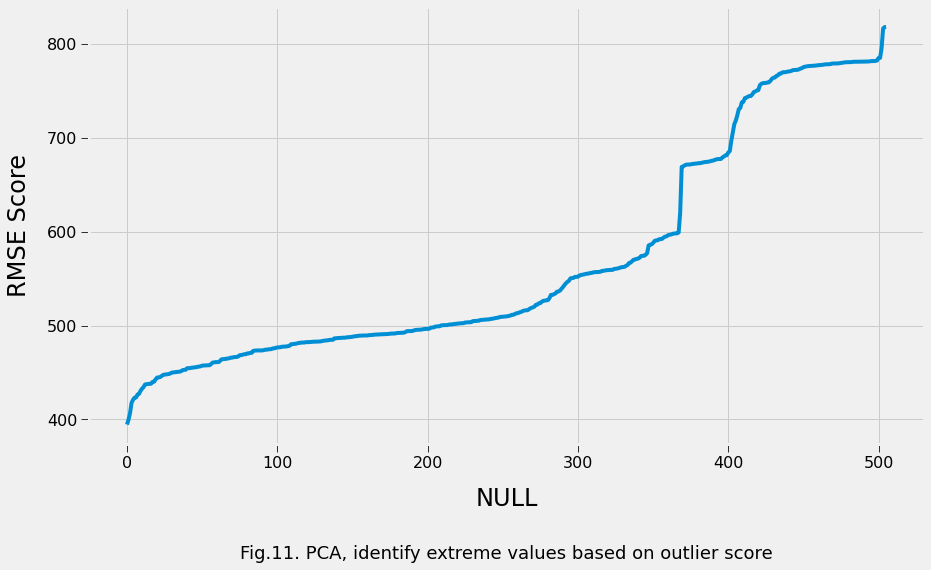

In [18]:
# Check the differnece between X and the inverse_reduced of X
# The equation np.sqrt((X-inverse_reduced)**2) = RMSE for any row
# Take sum() to get total RMSE across all columns
rmse_score = pd.DataFrame(np.sqrt(((X - inverse_reduced)**2).sum(axis=1)), columns=['MSE'])

rmse_score = np.sort(rmse_score, axis=0)

# Plot RMSE scores
fig,ax = plt.subplots(figsize=(13.33, 7.5))
ax.plot(rmse_score)
ax.set_ylabel('RMSE Score', size=24, labelpad=16)
ax.set_xlabel('NULL', size=24, labelpad=16)
ax.tick_params(axis='both', labelsize=16, length=8)

# Add caption
fignum += 1
figtxt = ". PCA, identify extreme values based on outlier score"
figcap = "Fig." + str(fignum) + figtxt
ax.text(0.5, -0.25, figcap, fontsize=18, ha='center', va='center', transform=ax.transAxes)
plt.savefig('fig' + str(fignum) + '-pca-outlier-score.png', bbox_inches='tight')

plt.show(); # top outliers have higher RMSE score (top right corner of plot)

<a class="anchor" id="higher_dimensional"></a>
# 5. Higher Dimensional Automatic Detection

Identifying and removing outliers is still challenging with simple statistical methods given the large number of input variables. Fortunately, the scikit-learn library also provides a number of built-in automatic outlier detection methods. These higher dimensional, automatic detection methods can be used in the modeling pipeline and compare to baseline model performance - similar to other data preparation transformations applied to the dataset.

* **Isolation Forest:** The algorithm isolates anomalies that are both few in number and different in the feature space.
* **Minimum Covariance Determinant:** The approach defines a hypersphere (ellipsoid) that covers the normal data (assumes a Gaussian distribution of input variables), and data that falls outside this shape is flagged as an outlier.
* **Local Outlier Factor:** The approach finds examples that are far away from the other examples in the feature space.
* **One-Class SVM:** The algorithm captures the density of the majority class and classifies examples of the density function as outliers, when modeling one-class (outliers).

The Baseline Model is using Linear Regression to predict a numeric value (y) from all numeric input variables (X). 

The model performance will be evaluated using the following two metrics:
<ol>
<li> R^2 (R squared) is the proportion of the variance in the dependent variable (y) that is explained (or predictable) from the independent variables (X).
<li> RMSE (root mean squared error) is a quadratic scoring rule that measures the average magnitude of the error. RMSE is the square root of the average squared differences between prediction and actual observation.
</ol>

The Baseline Model has an R^2 of 0.668 and a RMSE of 4.934

In [20]:
# Import machine learning libraries and modules
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the data from sklearn
from sklearn.datasets import load_boston
boston = load_boston()
X = boston.data
y = boston.target

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Summarize the shape of the original training dataset
print('Original Shape: {} {}'.format(X_train.shape, y_train.shape))

# Declare data preprocessing steps
numeric_features = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

# categorical_features = [None]
# categorical_transformer = Pipeline(steps=[
#                             ('onehot', OneHotEncoder(handle_unknown='ignore'))
#                             ])

preprocessor = ColumnTransformer(transformers=[
                ('num', numeric_transformer, numeric_features)
#                 ('cat', categorical_transformer, categorical_features)
                ])

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                          ('classifier', LinearRegression())
                          ])
 
# Tune model using cross-validation pipeline
clf = pipeline 
clf.fit(X_train, y_train)

# Summarize the shape of the updated training dataset
print('Updated Shape: {} {}'.format(X_train.shape, y_train.shape))

# Evaluate model pipeline on test data
yhat = clf.predict(X_test)
print('-----Baseline Model Performance-----')
print('R^2: {}'.format(r2_score(y_test, yhat)))
print('RMSE: {}'.format(np.sqrt(mean_squared_error(y_test, yhat))))

Original Shape: (404, 13) (404,)
Updated Shape: (404, 13) (404,)
-----Baseline Model Performance-----
R^2: 0.6679765786180172
RMSE: 4.934423328796878


<a class="anchor" id="isolation_forest"></a>
## 5.1 Isolation Forest

Isolation Forest, or iForest, is built on the basis of decision trees. Partitions are created in these trees by first randomly selecting a feature and then selecting a random split value between the minimum and maximum value of the selected feature. Since outliers (in theory) are less frequent and different in terms of values than normal observations, fewer splits should be required to identify these abnormal points. The algorithm provides the "contamination" argument that defines the expected ratio of outliers in the data and has a default value of 0.1. 

Isolation Forest identified and removed 41 outliers, but the model only achieved an R^2 of 0.635 and RMSE of 5.172. Perhaps better performance can be achieved with more tuning.

In [21]:
from sklearn.ensemble import IsolationForest

# Load the data from sklearn
from sklearn.datasets import load_boston
boston = load_boston()
X = boston.data
y = boston.target

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Summarize the shape of the original training dataset
print('Original Shape: {} {}'.format(X_train.shape, y_train.shape))

# Identify outliers in the training dataset
iso = IsolationForest(contamination=0.1)
yhat = iso.fit_predict(X_train)

# Select all rows that are not outliers
mask = yhat != -1
X_train, y_train = X_train[mask, :], y_train[mask]

# Tune model using cross-validation pipeline
clf = pipeline
clf.fit(X_train, y_train)

# Summarize the shape of the updated training dataset
print('Updated Shape: {} {}'.format(X_train.shape, y_train.shape))

# Evaluate model pipeline on test data
yhat = clf.predict(X_test)
print('R^2: {}'.format(r2_score(y_test, yhat)))
print('RMSE: {}'.format(np.sqrt(mean_squared_error(y_test, yhat))))

Original Shape: (404, 13) (404,)
Updated Shape: (363, 13) (363,)
R^2: 0.6351824567529367
RMSE: 5.172373788654671


<a class="anchor" id="mcd"></a>
## 5.2 Minimum Covariance Determinant

Minimum Covariance Determinant, or MCD, generalizes the assumption that input variables have a Gaussian distribution. Rather than applying simple statistical methods to a single input variable, MCD defines a multi-dimensional Gaussian feature space to identify values outside of the shape. The algorithm provides the "contamination" argument that defines the expected ratio of outliers in the data. 

Minimum Covariance Determinant identified and removed 5 outliers, and the model achieved an R^2 of 0.671 and RMSE of 4.911. Both values are an improvement from the baseline, suggesting a different set of outliers from isolation forest were identified and removed.

In [22]:
from sklearn.covariance import EllipticEnvelope

# Load the data from sklearn
from sklearn.datasets import load_boston
boston = load_boston()
X = boston.data
y = boston.target

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Summarize the shape of the original training dataset
print('Original Shape: {} {}'.format(X_train.shape, y_train.shape))

# Identify outliers in the training dataset
ee = EllipticEnvelope(contamination=0.01)
yhat = ee.fit_predict(X_train)

# Select all rows that are not outliers
mask = yhat != -1
X_train, y_train = X_train[mask, :], y_train[mask]

# Tune model using cross-validation pipeline
clf = pipeline
clf.fit(X_train, y_train)

# Summarize the shape of the updated training dataset
print('Updated Shape: {} {}'.format(X_train.shape, y_train.shape))

# Evaluate model pipeline on test data
yhat = clf.predict(X_test)
print('R^2: {}'.format(r2_score(y_test, yhat)))
print('RMSE: {}'.format(np.sqrt(mean_squared_error(y_test, yhat))))

Original Shape: (404, 13) (404,)
Updated Shape: (399, 13) (399,)
R^2: 0.671147317750805
RMSE: 4.910805564441851


<a class="anchor" id="lof"></a>
## 5.3 Local Outlier Factor

Local Outlier Factor, or LOF, is a model that attempts to leverage the concept of nearest neighbors for outlier detection. Each observation is assigned a score of how isolated or how likely it is to be an outlier based on the size of its local neighborhood. LOF provides the "contamination" argument, which is the expected percentage of outliers in the dataset and defaults to 0.1.

Local Outlier Factor identified and removed 43 outliers, and the model achieved an R^2 of 0.660 and RMSE of 4.995. Perhaps better performance can be achieved with more tuning.

In [23]:
from sklearn.neighbors import LocalOutlierFactor

# Load the data from sklearn
from sklearn.datasets import load_boston
boston = load_boston()
X = boston.data
y = boston.target

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Summarize the shape of the original training dataset
print('Original Shape: {} {}'.format(X_train.shape, y_train.shape))

# Identify outliers in the training dataset
lof = LocalOutlierFactor()
yhat = lof.fit_predict(X_train)

# Select all rows that are not outliers
mask = yhat != -1
X_train, y_train = X_train[mask, :], y_train[mask]

# Tune model using cross-validation pipeline
clf = pipeline
clf.fit(X_train, y_train)

# Summarize the shape of the updated training dataset
print('Updated Shape: {} {}'.format(X_train.shape, y_train.shape))

# Evaluate model pipeline on test data
yhat = clf.predict(X_test)
print('R^2: {}'.format(r2_score(y_test, yhat)))
print('RMSE: {}'.format(np.sqrt(mean_squared_error(y_test, yhat))))

Original Shape: (404, 13) (404,)
Updated Shape: (371, 13) (371,)
R^2: 0.6597189132757951
RMSE: 4.995407833940277


<a class="anchor" id="one_svm"></a>
## 5.4 One Class SVM

The support vector machine, or SVM, algorithm is primarily used for binary classification problems, but it can also be used for one-class classification to identify outliers. One Class SVM provides the "nu" argument to specify the approximate ratio of outliers in the dataset. The default value for nu is set to 0.1.

One Class SVM identified and removed 4 outliers, but the model only achieved an R^2 of 0.665 and RMSE of 4.957. The results are slightly lower than the baseline, so perhaps better performance can be achieved with more tuning.

In [24]:
from sklearn.svm import OneClassSVM

# Load the data from sklearn
from sklearn.datasets import load_boston
boston = load_boston()
X = boston.data
y = boston.target

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Summarize the shape of the original training dataset
print('Original Shape: {} {}'.format(X_train.shape, y_train.shape))

# Identify outliers in the training dataset
osvm = OneClassSVM(nu=0.01)
yhat = osvm.fit_predict(X_train)

# Select all rows that are not outliers
mask = yhat != -1
X_train, y_train = X_train[mask, :], y_train[mask]

# Tune model using cross-validation pipeline
clf = pipeline
clf.fit(X_train, y_train)

# Summarize the shape of the updated training dataset
print('Updated Shape: {} {}'.format(X_train.shape, y_train.shape))

# Evaluate model pipeline on test data
yhat = clf.predict(X_test)
print('R^2: {}'.format(r2_score(y_test, yhat)))
print('RMSE: {}'.format(np.sqrt(mean_squared_error(y_test, yhat))))

Original Shape: (404, 13) (404,)
Updated Shape: (400, 13) (400,)
R^2: 0.6649094742393025
RMSE: 4.957162086840979


<a class="anchor" id="conclusion"></a>
# 6. Conclusion

Outliers are a simple concept - values that are notably different from other data points, and they can cause problems in statistical procedures. A univariate outlier is a data point that consists of an extreme value on one variable, while a multivariate outlier is a combination of unusual scores on at least two variables. Both types of outliers can influence the outcome of statistical analyses and machine learning models. Unfortunately, there are no strict statistical rules for definitively identifying outliers. Finding outliers depends on subject-area knowledge and an understanding of the data collection process. While there is no solid mathematical definition, the guidelines and statistical tests described in this article can be used to successfully find outlier candidates.

<a class="anchor" id="acknowledgments"></a>
### Acknowledgments 

The project referenced the following resources:
* https://www.kdnuggets.com/2017/01/3-methods-deal-outliers.html
* https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba
* https://machinelearningmastery.com/clustering-algorithms-with-python/
* https://pca4ds.github.io/
* https://machinelearningmastery.com/how-to-identify-outliers-in-your-data/
* https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html

---
<em>The Code Caviar</em> is a digital magazine about data science and analytics that dives deep into key topics, so you can experience the thrill of solving at scale. 